In [4]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import GroverOperator
from qiskit.utils import QuantumInstance
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [5]:
# Создаем оракул для поиска состояния |11>
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Устанавливаем CZ-гейт для пометки состояния |11>

# Встраиваем оракул в алгоритм Гровера
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Применяем Hadamard к обоим кубитам для создания суперпозиции
qc.append(oracle, [0, 1])  # Добавляем оракул
qc.h([0, 1])  # Применяем Hadamard к обоим кубитам
qc.measure([0, 1], [0, 1])  # Измеряем кубиты

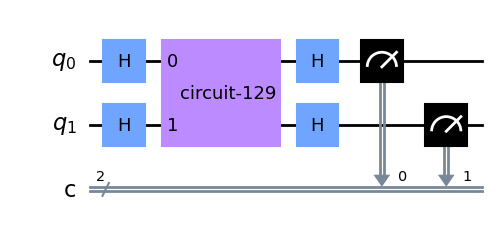

In [6]:
# Визуализируем квантовую схему
qc.draw("mpl")  # Отображаем схему в формате matplotlib

In [7]:
# Настраиваем симулятор
simulator = Aer.get_backend('qasm_simulator')

# Выполняем на симуляторе
job = execute(qc, simulator, shots=1024)
result = job.result()

# Получаем результаты и строим гистограмму
counts = result.get_counts(qc)
print("Результаты для алгоритма с оракулом:", counts)
plot_histogram(counts)
plt.show()

Результаты для алгоритма с оракулом: {'00': 251, '01': 254, '11': 272, '10': 247}
